In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
# Download required NLTK data (only needs to be done once)
nltk.download('vader_lexicon')

# Assuming your CSV file is named 'your_file.csv' and has a column named 'text'
# Replace 'your_file.csv' with your actual file name and 'text' with the actual column name
try:
    df = pd.read_csv('Data/raw_analyst_ratings.csv')
except FileNotFoundError:
    print("Error: 'your_file.csv' not found. Please upload the file or provide the correct path.")
    exit()

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Return the compound score

# Apply the sentiment analysis function to the 'text' column
df['sentiment_score'] = df['headline'].apply(analyze_sentiment)


# Classify sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

print(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/adane/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os


Row count:  1407328


# EDA Techniques

In [8]:
# 1. Sentiment Distribution
print("Sentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
display(sentiment_counts)

Sentiment Distribution:


sentiment
Neutral     741194
Positive    441858
Negative    224276
Name: count, dtype: int64

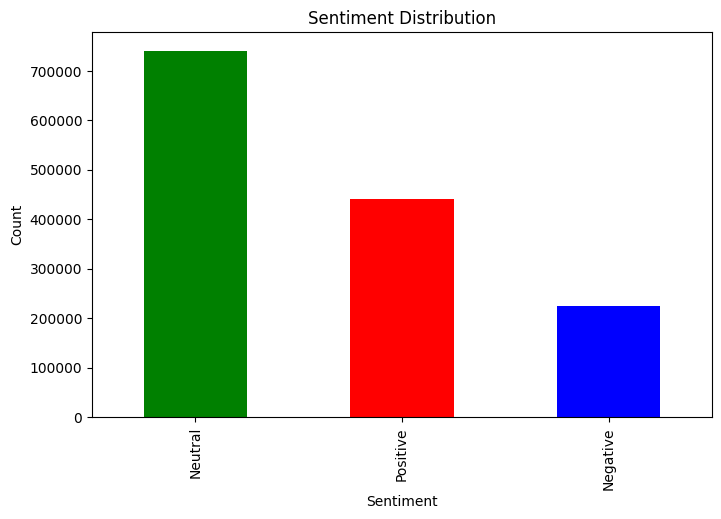

In [9]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
# 2. Average Sentiment Score by Publisher
print("Average sentiment score by publisher:")
average_sentiment_by_publisher = df.groupby('publisher')['sentiment_score'].mean()
display(average_sentiment_by_publisher)
average_sentiment_by_stock = df.groupby('stock')['sentiment_score'].mean()
display(average_sentiment_by_stock)

Average sentiment score by publisher:


publisher
47ertrends                    0.000000
AARP                          0.018429
ABNNewswire                   0.038731
Aakin                         0.136000
Aaron Jackson.Ed              0.322244
                                ...   
vic@forextraininggroup.com    0.000000
vishwanath@benzinga.com      -0.049120
vivek.proactive@gmail.com    -0.045008
wallstreet1928               -0.018150
webmaster                     0.034903
Name: sentiment_score, Length: 1034, dtype: float64

stock
A       0.070783
AA      0.042446
AAC     0.029539
AADR    0.084750
AAL     0.062757
          ...   
ZTR     0.037974
ZTS     0.078401
ZU      0.077445
ZUMZ    0.036719
ZX      0.008416
Name: sentiment_score, Length: 6204, dtype: float64

In [ ]:
# Plot average sentiment by publisher
average_sentiment_by_publisher.sort_values().plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Average Sentiment Score by Publisher')
plt.xlabel('Sentiment Score')
plt.ylabel('Publisher')
plt.show()

In [ ]:
average_sentiment_by_stock.sort_values().plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Average Sentiment Score by Publisher')
plt.xlabel('Sentiment Score')
plt.ylabel('stock')
plt.show()

In [ ]:
# 3. Sentiment Over Time (if dates are present)
if 'date' in df.columns:
    print("Sentiment Score Over Time:")
    df['date'] = pd.to_datetime(df['date'])  # Ensure date is in datetime format
    df.set_index('date', inplace=True)
    sentiment_over_time = df.resample('M')['sentiment_score'].mean()
    display(sentiment_over_time)

    # Plot sentiment over time
    plt.figure(figsize=(12, 6))
    sentiment_over_time.plot(color='orange')
    plt.title('Average Sentiment Score Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.show()